## Ceneo analyser

## Imports

In [113]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## list all codes of products for which opinions have been collected

In [114]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

108290707
113983069;02517


## Enter code of product about which opinions are to be analysed

## 

In [115]:
product_id = input("Enter product code: ")

## Reading opinions from JSON file to pandas.DataFrame

In [116]:
MAX_SCORE = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.score = opinions.score.apply(lambda s: round((s*MAX_SCORE),1))

## Basic statistics

In [124]:
opinions_count = opinions.index.size
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avearge_scorer = (opinions.score.mean()).round(3)
avearge_scorer

4.18

## Basic charts

opinions score histogram

[Text(0, 0, '0.5'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.5'),
 Text(3, 0, '2.0'),
 Text(4, 0, '2.5'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.5'),
 Text(7, 0, '4.0'),
 Text(8, 0, '4.5'),
 Text(9, 0, '5.0')]

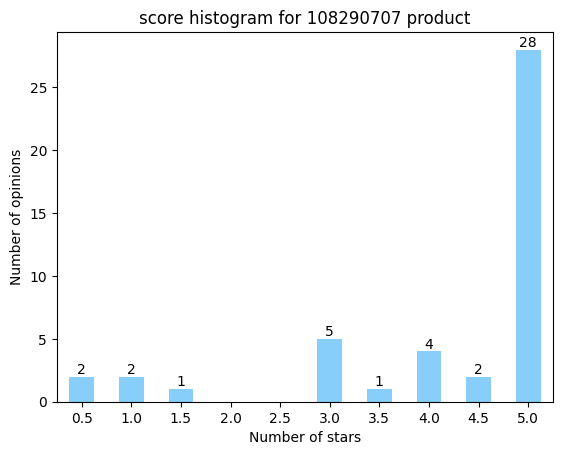

In [125]:
score_distrubtion = opinions.score.value_counts().sort_index().reindex(np.arange(0.5,5.5,0.5))
fig, ax = plt.subplots()
score_distrubtion.plot.bar(color="lightskyblue")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l:int(l) if l > 0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number of opinions")
ax.set_title(f"score histogram for {product_id} product")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

### Opinions recommendation share

Text(0.5, 1.0, 'Recommendation shares for 108290707 product')

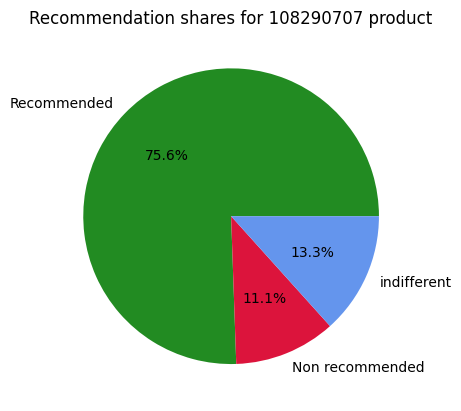

In [127]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
recommendation_distribution.plot.pie(
    labels = ["Recommended", "Non recommended", "indifferent"],
    label = "",
    colors = ["forestgreen", "crimson", "cornflowerblue"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"Recommendation shares for {product_id} product")